In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

#from tqdm import tqdm_notebook            # pip install tqdm
from tqdm import tqdm            # pip install tqdm
from libs import stock_daum, stock_naver  # local libraries

In [27]:
import time
for i in tqdm(range(10)):
    time.sleep(0.1)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.80it/s]


## KOSPI 200 크롤링하기

In [29]:
df_list = []
for page_df in tqdm(stock_naver.get_kospi200('KPI200', 600)):
    df_list.append(page_df)

kpi200_df = pd.concat(df_list)
print(kpi200_df.shape)
kpi200_df.head()

600it [03:14,  3.08it/s]


(3600, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2021-04-28,427.48,4.66,-1.08%,261384,12592096
2021-04-27,432.14,0.22,-0.05%,216227,11490681
2021-04-26,432.36,4.02,+0.94%,244075,10646666
2021-04-23,428.34,0.97,+0.23%,215677,9954868
2021-04-22,427.37,0.62,+0.15%,202883,9565100


## S&P 500 크롤링하기

+ http://finance.daum.net/global/quotes/US.

In [31]:
df_list = []
for page_df in tqdm(stock_daum.get_us_sp500()):
    df_list.append(page_df)

us_sp500_df = pd.concat(df_list)
print(us_sp500_df.shape)
us_sp500_df.head()

42it [00:11,  3.81it/s]

(4106, 16)


,accTradePrice,accTradeVolume,change,changePrice,changeRate,exchangeCountry,highPrice,listedSharesCount,lowPrice,openingPrice,periodTradePrice,periodTradeVolume,prevClosingPrice,symbolCode,tradePrice,tradeTime
date,,,,,,,,,,,,,,,,
2021-04-27,0,1979867150,FALL,0.90,-0.000215,USA,4193.35,None,4176.22,4188.25,0,1979867150,4187.62,US.SP500,4186.72,16:05:07
2021-04-26,0,1876477624,RISE,7.45,0.001782,USA,4194.19,None,4182.36,4185.03,0,1876477624,4180.17,US.SP500,4187.62,16:04:53
2021-04-23,0,1979298089,RISE,45.19,0.010929,USA,4194.17,None,4138.78,4138.78,0,1979298089,4134.98,US.SP500,4180.17,16:04:54
2021-04-22,0,2341692989,FALL,38.44,-0.009211,USA,4179.57,None,4123.69,4170.46,0,2341692989,4173.42,US.SP500,4134.98,16:05:33
2021-04-21,0,2065235643,RISE,38.48,0.009306,USA,4175.02,None,4126.35,4128.42,0,2065235643,4134.94,US.SP500,4173.42,16:05:36


## 한 Axes에 그리기

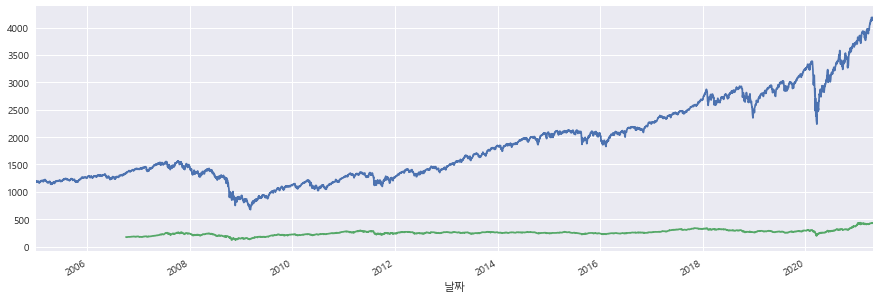

In [32]:
# 한 AX에 그리기
ax = us_sp500_df['tradePrice'].plot(figsize=(15, 5))
kpi200_df['체결가'].plot(figsize=(15, 5), ax=ax)

In [33]:
df = pd.DataFrame({
    'kpi200': kpi200_df['체결가'],
    'us_sp500': us_sp500_df['tradePrice'],
})
print(df.shape)
df.head()

(4215, 2)


,kpi200,us_sp500
2005-01-03,NaN,1202.08
2005-01-04,NaN,1188.05
2005-01-05,NaN,1183.74
2005-01-06,NaN,1187.89
2005-01-07,NaN,1186.19


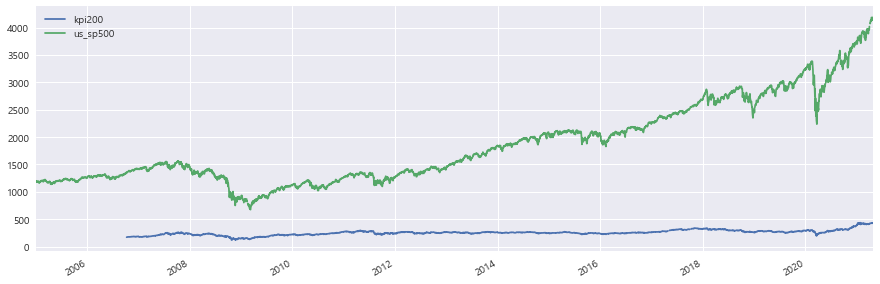

In [34]:
df.plot(figsize=(15, 5))

## 단위가 다른 2개 차트를 Ratio로 표현하여 맞추기

In [39]:
시작가 = kpi200_df['체결가'][-1]
kpi200_ratio_series = 100 * kpi200_df['체결가'] / 시작가

In [40]:
시작가 = us_sp500_df['tradePrice'][-1]
us_sp500_ratio_series = 100 * us_sp500_df['tradePrice'] / 시작가

In [41]:
df = pd.DataFrame({
    'kpi200': kpi200_ratio_series,
    'us_sp500': us_sp500_ratio_series,
})
print(df.shape)
df.head()

(4215, 2)


,kpi200,us_sp500
2005-01-03,NaN,100.000000
2005-01-04,NaN,98.832856
2005-01-05,NaN,98.474311
2005-01-06,NaN,98.819546
2005-01-07,NaN,98.678125


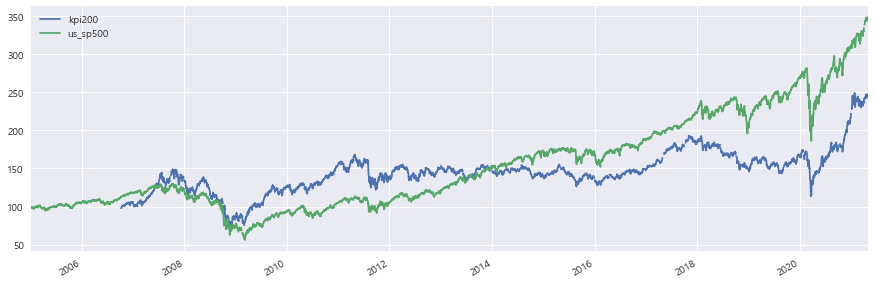

In [42]:
df.plot(figsize=(15, 5))